# Orthogonal Projections

We will write functions that will implement orthogonal projections.

In [1]:
import numpy as np

## 1. Orthogonal Projections

Recall that for projection of a vector $\boldsymbol x$ onto a 1-dimensional subspace $U$ with basis vector $\boldsymbol b$ we have

$${\pi_U}(\boldsymbol x) = \frac{\boldsymbol b\boldsymbol b^T}{{\lVert\boldsymbol  b \rVert}^2}\boldsymbol x $$

And for the general projection onto an M-dimensional subspace $U$ with basis vectors $\boldsymbol b_1,\dotsc, \boldsymbol b_M$ we have

$${\pi_U}(\boldsymbol x) = \boldsymbol B(\boldsymbol B^T\boldsymbol B)^{-1}\boldsymbol B^T\boldsymbol x $$

where 

$$\boldsymbol B = [\boldsymbol b_1,...,\boldsymbol b_M]$$


Your task is to implement orthogonal projections. We can split this into two steps
1. Find the projection matrix $\boldsymbol P$ that projects any $\boldsymbol x$ onto $U$.
2. The projected vector $\pi_U(\boldsymbol x)$ of $\boldsymbol x$ can then be written as $\pi_U(\boldsymbol x) = \boldsymbol P\boldsymbol x$.

To perform step 1, you need to complete the function `projection_matrix_1d` and `projection_matrix_general`. To perform step 2, complete `project_1d` and `project_general`.

### Projection (1d)


In [2]:
def projection_matrix_1d(b):
    """Compute the projection matrix onto the space spanned by `b`
    Args:
        b: ndarray of dimension (D,), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    # YOUR CODE HERE
    P = (b*b.T)/(b@b)
    return P

With the help of the function `projection_matrix_1d`, you should be able 
to implement `project_1d`.

In [3]:
def project_1d(x, b):
    """Compute the projection matrix onto the space spanned by `b`
    Args:
        x: the vector to be projected
        b: ndarray of dimension (D,), the basis for the subspace
    
    Returns:
        y: ndarray of shape (D,) projection of x in space spanned by b
    """
    # YOUR CODE HERE
    P = projection_matrix_1d(b)
    p = P * x
    return p


### Projection (ND)

In [4]:
def projection_matrix_general(B):
    """Compute the projection matrix onto the space spanned by the columns of `B`
    Args:
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        P: the projection matrix
    """
    # YOUR CODE HERE
    P = np.matmul(np.matmul(B, np.linalg.inv(np.matmul(B.T, B))), B.T)
    return P

In [5]:
def project_general(x, B):
    """Compute the projection matrix onto the space spanned by the columns of `B`
    Args:
        x: ndarray of dimension (D, 1), the vector to be projected
        B: ndarray of dimension (D, M), the basis for the subspace
    
    Returns:
        p: projection of x onto the subspac spanned by the columns of B; size (D, 1)
    """
    # YOUR CODE HERE
    P = projection_matrix_general(B)
    p = np.matmul(P, x)
    return p

# Project digits images
In this part we load some persian digits data to perform projection to.

In [6]:
load_limit = 100

def load_data(filename):
    fh = open(filename, 'r')
    file_length = len(fh.readlines())
    fh.seek(0, 0)
    data = np.zeros(shape=(min(load_limit, file_length), 1200))
    for i, line in enumerate(fh):
        if i == min(load_limit, file_length):
            break
        a_list = line.split(',')
        map_object = map(int, a_list)
        data[i] = list(map_object)
    fh.close()
    return data

`show_image` will convert (1200, 1) vector into the image

In [7]:
import matplotlib.pyplot as plt
def show_image(vector, save_path='no'):  # the input is a 1 * 1200 vector and should convert to a 40 * 30 image
    vector = vector.reshape(40, 30) * 255
    plt.imshow(vector, cmap='Greys_r', vmin=0, vmax=255)
    if save_path != 'no':
        plt.savefig(save_path)
    plt.show()

first 5 images:

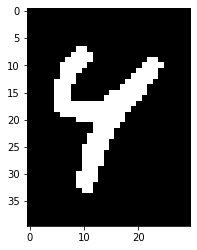

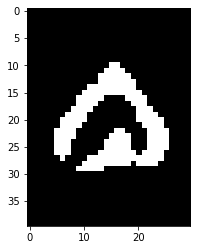

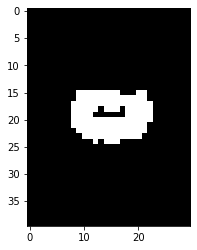

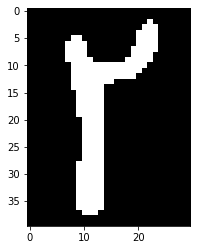

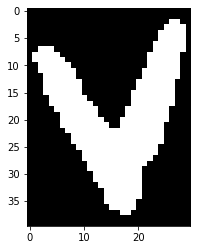

In [8]:
a = load_data("TrainData.txt")
for i in range(5):
    show_image(a[i])

## project to random B
in this part we want to project first 5 images into a random numpy array with shape=(1200, x)

find the minimum of x that images still can be verified

In [9]:
# YOUR CODE HERE
try:
    # mse = mean square error 
    a = load_data("TrainData.txt")
    projections = a
    mse = np.zeros((13, 5), dtype='float32')
    for x in range(1200, -100, -100): # x=1200...x=0 , step size = 100
        B = np.random.rand(1200, x)
        for i in range(5):
            if x == 1:
                mse[x//100][i] = np.square(np.subtract(a[i], project_1d(a[i], B[:, 0]))).mean()
            else:
                mse[x//100][i] = np.square(np.subtract(a[i], project_general(a[i], B))).mean()
except:
    raise NotImplementedError

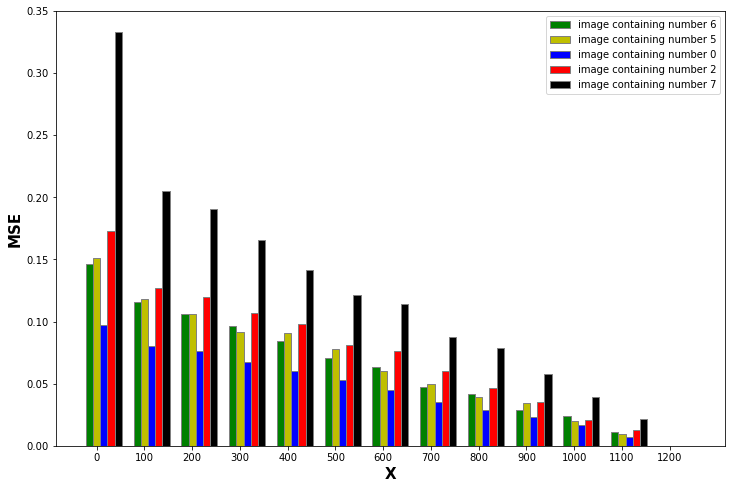

In [10]:
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))
 
# Set position of bar on X axis
br1 = np.arange(13)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
 
# Make the plot
plt.bar(br1, mse[:,0], color ='g', width = barWidth,
        edgecolor ='grey', label ='image containing number 6')
plt.bar(br2, mse[:,1], color ='y', width = barWidth,
        edgecolor ='grey', label ='image containing number 5')
plt.bar(br3, mse[:,2], color ='b', width = barWidth,
        edgecolor ='grey', label ='image containing number 0')
plt.bar(br4, mse[:,3], color ='r', width = barWidth,
        edgecolor ='grey', label ='image containing number 2')
plt.bar(br5, mse[:,4], color ='k', width = barWidth,
        edgecolor ='grey', label ='image containing number 7')

# Adding Xticks
plt.xlabel('X', fontweight ='bold', fontsize = 15)
plt.ylabel('MSE', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(13)], range(0, 1300, 100))
 
plt.legend()
plt.show()

According to the above diagram, it is clear that with decreasing X, the value of MSE has also decreased, but about $x \approx 100-200$, a jump has actually occurred.
<br/>
So I show the orthogonal projection on the space with shape = (1200, 100) to see if the numbers inside of it are clear or not.

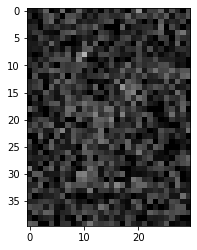

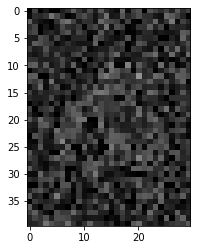

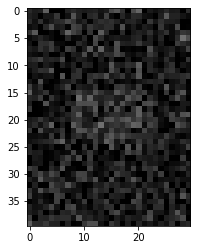

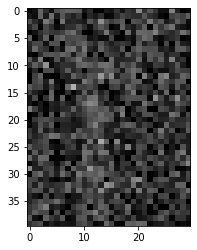

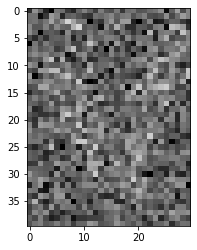

In [11]:
B = np.random.rand(1200, 100)
for i in range(5):
    show_image(project_general(a[i], B))

As you can see the result is awful 😕👎
<br/>
So I also show the orthogonal image on the space with the shapes (1200, 200)

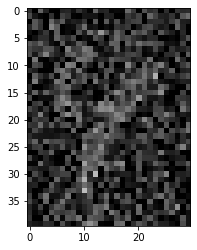

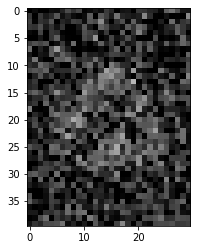

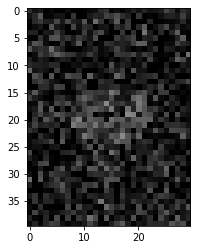

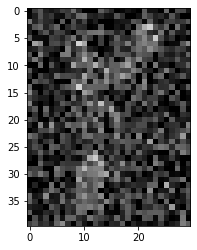

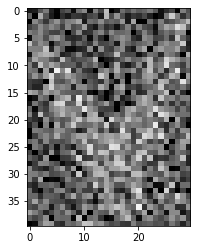

In [12]:
B = np.random.rand(1200, 200)
for i in range(5):
    show_image(project_general(a[i], B))

Well I can almost recognize the numbers 😃👍
<br/>
<b>So the minimum of x that images still can be verified is something about 200<b/>